# Importing necessary libraries

In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [1]:
import numpy as np
import pandas as pd
##import tensorflow as tf
#from lime import lime_image
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import keras.backend as K
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from IPython.display import clear_output
#from skimage.segmentation import mark_boundaries
from sklearn.model_selection import train_test_split
import os
from glob import glob
import random
#from imblearn.over_sampling import SMOTE

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-1-2617345bd13b>, line 8)

In [3]:
#path="/workspace/safeicu/aditya/Aditya's work/los_new/mimic_los_classification/"

In [4]:
# np.random.seed(123)
# tf.set_random_seed(123)

### Data


In [5]:
main_path = "/home/safeicu/aditya/SI_cohort_mimic_one_ins/SI_cohort_with_dias/with_demo_mimic_si/"

bor_x_train = pd.read_csv(main_path + "si_train_full_res.csv")
bor_x_val = pd.read_csv(main_path + "si_val_full_res.csv")
bor_x_test = pd.read_csv(main_path + "si_test_full_res.csv")

demo_train = bor_x_train[['GENDER', 'age']]
demo_val = bor_x_val[['GENDER', 'age']]
demo_test = bor_x_test[['GENDER', 'age']]

In [6]:
y_train = bor_x_train[['label']]
y_val = bor_x_val[['label']]
y_test = bor_x_test[['label']]

x_train = np.array(bor_x_train.drop(['id', 'GENDER', 'age', 'label'], axis = 1))
x_val = np.array(bor_x_val.drop(['id', 'GENDER', 'age', 'label', ], axis = 1))
x_test = np.array(bor_x_test.drop(['id', 'GENDER', 'age', 'label'], axis = 1))

In [7]:
## When (var,  timestep)

In [8]:
x_train_hr = x_train[:,0:256]
mean_hr_tr = np.mean(x_train_hr)
std_hr_tr = np.nanstd(x_train_hr)
x_train_hr = (x_train_hr - mean_hr_tr)/(std_hr_tr)
                                                        ##, ddof = 1) + K.epsilon())
print(x_train_hr.shape)

x_train_resp = x_train[:,256:512]
mean_resp_tr = np.mean(x_train_resp)
std_resp_tr = np.nanstd(x_train_resp)
x_train_resp = (x_train_resp - mean_resp_tr)/(std_resp_tr)
                                                              ##, ddof = 1) + K.epsilon())
print(x_train_resp.shape)

x_train_sp = x_train[:,512:768]
mean_sp_tr = np.mean(x_train_sp)
std_sp_tr = np.nanstd(x_train_sp)
x_train_sp = (x_train_sp - mean_sp_tr)/(std_sp_tr)
                                                        ##, ddof = 1) + K.epsilon())
print(x_train_sp.shape)

x_train_sys = x_train[:,768:1024]
mean_sys_tr = np.mean(x_train_sys)
std_sys_tr = np.nanstd(x_train_sys)
x_train_sys = (x_train_sys -mean_sys_tr)/ (std_sys_tr)
                                                            ##, ddof = 1) + K.epsilon())
print(x_train_sys.shape)

x_train_dias = x_train[:,1024:1280]
mean_dias_tr = np.mean(x_train_dias)
std_dias_tr = np.nanstd(x_train_dias)
x_train_dias = (x_train_dias - mean_dias_tr)/ (std_dias_tr)
                                                               ##, ddof = 1) + K.epsilon())
print(x_train_dias.shape)
############## Validation centring ###########
x_val_hr = x_val[:,0:256]
x_val_hr = (x_val_hr - mean_hr_tr)/ std_hr_tr
                                                     #, ddof = 1) + K.epsilon())

x_val_resp = x_val[:,256:512]
x_val_resp = (x_val_resp - mean_resp_tr)/std_resp_tr
                                                          ##, ddof = 1) + K.epsilon())

x_val_sp = x_val[:,512:768]
x_val_sp = (x_val_sp - mean_sp_tr) / std_sp_tr
                                                      ##, ddof = 1) + K.epsilon())

x_val_sys = x_val[:,768:1024]
x_val_sys = (x_val_sys - mean_sys_tr)/ (std_sys_tr)
                                                        #, ddof = 1) + K.epsilon())

x_val_dias = x_val[:,1024:1280]
print(np.mean(x_val_dias))
x_val_dias = (x_val_dias - mean_dias_tr)/ (std_dias_tr)
                                                           #, ddof = 1) + K.epsilon())
print(x_train_dias.shape)

######################### Test centering ##############
x_test_hr = x_test[:,0:256]
x_test_hr = (x_test_hr - mean_hr_tr )/ (std_hr_tr) 
                                                        #ddof = 1) + K.epsilon())

x_test_resp = x_test[:,256:512]
x_test_resp = (x_test_resp - mean_resp_tr)/ (std_resp_tr)
                                                             #ddof = 1) + K.epsilon())

x_test_sp = x_test[:,512:768]
x_test_sp = (x_test_sp - mean_sp_tr)/ (std_sp_tr) 
                                                       #ddof = 1) + K.epsilon())

x_test_sys = x_test[:,768:1024]
x_test_sys = (x_test_sys - mean_sys_tr)/ (std_sys_tr)

x_test_dias = x_test[:,1024:1280]
print(np.mean(x_test_dias))
x_test_dias = (x_test_dias - mean_dias_tr)/ (std_dias_tr)
print(x_test_dias.shape)


(1516, 256)
(1516, 256)
(1516, 256)
(1516, 256)
(1516, 256)
62.83834652827246
(1516, 256)
61.927627559304284
(415, 256)


In [9]:
from numpy import zeros, newaxis
#x_train_hr = np.array(x_train_hr)

x_train_hr = x_train_hr[:, newaxis,:]
x_train_resp = x_train_resp[:, newaxis,:]
x_train_sp = x_train_sp[:,newaxis,:]
x_train_sys = x_train_sys[:,newaxis,:]
x_train_dias = x_train_dias[:,newaxis,:]

x_val_hr = x_val_hr[:,newaxis,:]
x_val_resp = x_val_resp[:,newaxis,:]
x_val_sp = x_val_sp[:,newaxis,:]
x_val_sys = x_val_sys[:, newaxis,:]
x_val_dias = x_val_dias[:,newaxis,:]

x_test_hr = x_test_hr[:,newaxis,:]
x_test_resp = x_test_resp[:, newaxis,:]
x_test_sp = x_test_sp[:,  newaxis,:]
x_test_sys = x_test_sys[:, newaxis,:]
x_test_dias = x_test_dias[:, newaxis,:]

In [10]:
x_train =  np.hstack((np.array(x_train_hr), np.array(x_train_resp), np.array(x_train_sp), np.array(x_train_sys), np.array(x_train_dias))) 
x_val =  np.hstack((np.array(x_val_hr), np.array(x_val_resp), np.array(x_val_sp), np.array(x_val_sys),np.array(x_val_dias)))
x_test =  np.hstack((np.array(x_test_hr), np.array(x_test_resp), np.array(x_test_sp), np.array(x_test_sys),np.array(x_test_dias))) 
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1516, 5, 256)
(415, 5, 256)
(415, 5, 256)


In [11]:
age = demo_train['age'] 
tr_age_tr = age.mean(axis=0)
tr_age_std = age.std(axis=0)
demo_train['age'] = (demo_train['age']  - tr_age_tr) /tr_age_std
demo_val['age'] = (demo_val['age'] - tr_age_tr)/ tr_age_std
demo_test['age'] = (demo_test['age'] - tr_age_tr)/ tr_age_std

/home/safeicu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/safeicu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/safeicu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [12]:
import keras

In [13]:
y_train = y_train.replace('Abnormal', '1')
y_train = y_train.replace('Normal', '0')

y_test = y_test.replace('Abnormal', '1')
y_test = y_test.replace('Normal', '0')

y_val = y_val.replace('Abnormal', '1')
y_val = y_val.replace('Normal', '0')





In [14]:
y_train = keras.utils.to_categorical(y_train, 2)
print(y_train.shape)
y_test = keras.utils.to_categorical(y_test, 2)
print(y_test.shape)
y_val = keras.utils.to_categorical(y_val, 2)
print(y_val.shape)


(1516, 2)
(415, 2)
(415, 2)


In [15]:
import keras

In [16]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout


In [17]:
from __future__ import absolute_import
import numpy as np

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine import Layer
from keras.engine import InputSpec
from keras.legacy import interfaces
from keras.layers import Recurrent


def _time_distributed_dense(x, w, b=None, dropout=None,
                            input_dim=None, output_dim=None,
                            timesteps=None, training=None):
    """Apply `y . w + b` for every temporal slice y of x.
    # Arguments
        x: input tensor.
        w: weight matrix.
        b: optional bias vector.
        dropout: wether to apply dropout (same dropout mask
            for every temporal slice of the input).
        input_dim: integer; optional dimensionality of the input.
        output_dim: integer; optional dimensionality of the output.
        timesteps: integer; optional number of timesteps.
        training: training phase tensor or boolean.
    # Returns
        Output tensor.
    """
    if not input_dim:
        input_dim = K.shape(x)[2]
    if not timesteps:
        timesteps = K.shape(x)[1]
    if not output_dim:
        output_dim = K.int_shape(w)[1]

    if dropout is not None and 0. < dropout < 1.:
        # apply the same dropout pattern at every timestep
        ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
        dropout_matrix = K.dropout(ones, dropout)
        expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
        x = K.in_train_phase(x * expanded_dropout_matrix, x, training=training)

    # collapse time dimension and batch dimension together
    x = K.reshape(x, (-1, input_dim))
    x = K.dot(x, w)
    if b is not None:
        x = K.bias_add(x, b)
    # reshape to 3D tensor
    if K.backend() == 'tensorflow':
        x = K.reshape(x, K.stack([-1, timesteps, output_dim]))
        x.set_shape([None, None, output_dim])
    else:
        x = K.reshape(x, (-1, timesteps, output_dim))
    return x


class AttentionLSTM(Recurrent):
    """Long-Short Term Memory unit - with Attention.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](keras/activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](keras/activations.md)).
        attention_activation: Activation function to use
            for the attention step. If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
            (see [activations](keras/activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        attention_initializer: Initializer for the `attention_kernel` weights
            matrix, used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        attention_regularizer: Regularizer function applied to
            the `attention_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        attention_constraint: Constraint function applied to
            the `attention_kernel` weights matrix
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        return_attention: Returns the attention vector instead of
            the internal state.
    # References
        - [Long short-term memory](http://deeplearning.cs.cmu.edu/pdfs/Hochreiter97_lstm.pdf) (original 1997 paper)
        - [Learning to forget: Continual prediction with LSTM](http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
        - [Bahdanau, Cho & Bengio (2014), "Neural Machine Translation by Jointly Learning to Align and Translate"](https://arxiv.org/pdf/1409.0473.pdf)
        - [Xu, Ba, Kiros, Cho, Courville, Salakhutdinov, Zemel & Bengio (2016), "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention"](http://arxiv.org/pdf/1502.03044.pdf)
    """
    @interfaces.legacy_recurrent_support
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 attention_activation='tanh',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 attention_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 attention_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 attention_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 return_attention=False,
                 implementation=1,
                 **kwargs):
        super(AttentionLSTM, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.attention_activation = activations.get(attention_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.attention_initializer = initializers.get(attention_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.attention_regularizer = regularizers.get(attention_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.attention_constraint = constraints.get(attention_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.return_attention = return_attention
        self.state_spec = [InputSpec(shape=(None, self.units)),
                           InputSpec(shape=(None, self.units))]
        self.implementation = implementation

    def build(self, input_shape):
        if isinstance(input_shape, list):
            input_shape = input_shape[0]

        batch_size = input_shape[0] if self.stateful else None
        self.timestep_dim = input_shape[1]
        self.input_dim = input_shape[2]
        self.input_spec[0] = InputSpec(shape=(batch_size, None, self.input_dim))

        self.states = [None, None]
        if self.stateful:
            self.reset_states()

        self.kernel = self.add_weight(shape=(self.input_dim, self.units * 4),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 4),
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        # add attention kernel
        self.attention_kernel = self.add_weight(
            shape=(self.input_dim, self.units * 4),
            name='attention_kernel',
            initializer=self.attention_initializer,
            regularizer=self.attention_regularizer,
            constraint=self.attention_constraint)

        # add attention weights
        # weights for attention model
        self.attention_weights = self.add_weight(shape=(self.input_dim, self.units),
                                                 name='attention_W',
                                                 initializer=self.attention_initializer,
                                                 regularizer=self.attention_regularizer,
                                                 constraint=self.attention_constraint)

        self.attention_recurrent_weights = self.add_weight(shape=(self.units, self.units),
                                                           name='attention_U',
                                                           initializer=self.recurrent_initializer,
                                                           regularizer=self.recurrent_regularizer,
                                                           constraint=self.recurrent_constraint)

        if self.use_bias:
            if self.unit_forget_bias:
                def bias_initializer(shape, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer
            self.bias = self.add_weight(shape=(self.units * 4,),
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)

            self.attention_bias = self.add_weight(shape=(self.units,),
                                                  name='attention_b',
                                                  initializer=self.bias_initializer,
                                                  regularizer=self.bias_regularizer,
                                                  constraint=self.bias_constraint)

            self.attention_recurrent_bias = self.add_weight(shape=(self.units, 1),
                                                            name='attention_v',
                                                            initializer=self.bias_initializer,
                                                            regularizer=self.bias_regularizer,
                                                            constraint=self.bias_constraint)
        else:
            self.bias = None
            self.attention_bias = None
            self.attention_recurrent_bias = None

        self.kernel_i = self.kernel[:, :self.units]
        self.kernel_f = self.kernel[:, self.units: self.units * 2]
        self.kernel_c = self.kernel[:, self.units * 2: self.units * 3]
        self.kernel_o = self.kernel[:, self.units * 3:]

        self.recurrent_kernel_i = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_f = self.recurrent_kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_c = self.recurrent_kernel[:, self.units * 2: self.units * 3]
        self.recurrent_kernel_o = self.recurrent_kernel[:, self.units * 3:]

        self.attention_i = self.attention_kernel[:, :self.units]
        self.attention_f = self.attention_kernel[:, self.units: self.units * 2]
        self.attention_c = self.attention_kernel[:, self.units * 2: self.units * 3]
        self.attention_o = self.attention_kernel[:, self.units * 3:]

        if self.use_bias:
            self.bias_i = self.bias[:self.units]
            self.bias_f = self.bias[self.units: self.units * 2]
            self.bias_c = self.bias[self.units * 2: self.units * 3]
            self.bias_o = self.bias[self.units * 3:]
        else:
            self.bias_i = None
            self.bias_f = None
            self.bias_c = None
            self.bias_o = None

        self.built = True

    def preprocess_input(self, inputs, training=None):
        return inputs

    def get_constants(self, inputs, training=None):
        constants = []
        if self.implementation != 0 and 0 < self.dropout < 1:
            input_shape = K.int_shape(inputs)
            input_dim = input_shape[-1]
            ones = K.ones_like(K.reshape(inputs[:, 0, 0], (-1, 1)))
            ones = K.tile(ones, (1, int(input_dim)))

            def dropped_inputs():
                return K.dropout(ones, self.dropout)

            dp_mask = [K.in_train_phase(dropped_inputs,
                                        ones,
                                        training=training) for _ in range(4)]
            constants.append(dp_mask)
        else:
            constants.append([K.cast_to_floatx(1.) for _ in range(4)])

        if 0 < self.recurrent_dropout < 1:
            ones = K.ones_like(K.reshape(inputs[:, 0, 0], (-1, 1)))
            ones = K.tile(ones, (1, self.units))

            def dropped_inputs():
                return K.dropout(ones, self.recurrent_dropout)
            rec_dp_mask = [K.in_train_phase(dropped_inputs,
                                            ones,
                                            training=training) for _ in range(4)]
            constants.append(rec_dp_mask)
        else:
            constants.append([K.cast_to_floatx(1.) for _ in range(4)])

        # append the input as well for use later
        constants.append(inputs)
        return constants

    def step(self, inputs, states):
        h_tm1 = states[0]
        c_tm1 = states[1]
        dp_mask = states[2]
        rec_dp_mask = states[3]
        x_input = states[4]

        # alignment model
        h_att = K.repeat(h_tm1, self.timestep_dim)
        att = _time_distributed_dense(x_input, self.attention_weights, self.attention_bias,
                                      output_dim=K.int_shape(self.attention_weights)[1])
        attention_ = self.attention_activation(K.dot(h_att, self.attention_recurrent_weights) + att)
        attention_ = K.squeeze(K.dot(attention_, self.attention_recurrent_bias), 2)

        alpha = K.exp(attention_)

        if dp_mask is not None:
            alpha *= dp_mask[0]

        alpha /= K.sum(alpha, axis=1, keepdims=True)
        alpha_r = K.repeat(alpha, self.input_dim)
        alpha_r = K.permute_dimensions(alpha_r, (0, 2, 1))

        # make context vector (soft attention after Bahdanau et al.)
        z_hat = x_input * alpha_r
        context_sequence = z_hat
        z_hat = K.sum(z_hat, axis=1)

        if self.implementation == 2:
            z = K.dot(inputs * dp_mask[0], self.kernel)
            z += K.dot(h_tm1 * rec_dp_mask[0], self.recurrent_kernel)
            z += K.dot(z_hat, self.attention_kernel)

            if self.use_bias:
                z = K.bias_add(z, self.bias)

            z0 = z[:, :self.units]
            z1 = z[:, self.units: 2 * self.units]
            z2 = z[:, 2 * self.units: 3 * self.units]
            z3 = z[:, 3 * self.units:]

            i = self.recurrent_activation(z0)
            f = self.recurrent_activation(z1)
            c = f * c_tm1 + i * self.activation(z2)
            o = self.recurrent_activation(z3)
        else:
            if self.implementation == 0:
                x_i = inputs[:, :self.units]
                x_f = inputs[:, self.units: 2 * self.units]
                x_c = inputs[:, 2 * self.units: 3 * self.units]
                x_o = inputs[:, 3 * self.units:]
            elif self.implementation == 1:
                x_i = K.dot(inputs * dp_mask[0], self.kernel_i) + self.bias_i
                x_f = K.dot(inputs * dp_mask[1], self.kernel_f) + self.bias_f
                x_c = K.dot(inputs * dp_mask[2], self.kernel_c) + self.bias_c
                x_o = K.dot(inputs * dp_mask[3], self.kernel_o) + self.bias_o
            else:
                raise ValueError('Unknown `implementation` mode.')

            i = self.recurrent_activation(x_i + K.dot(h_tm1 * rec_dp_mask[0], self.recurrent_kernel_i)
                                              + K.dot(z_hat, self.attention_i))
            f = self.recurrent_activation(x_f + K.dot(h_tm1 * rec_dp_mask[1], self.recurrent_kernel_f)
                                          + K.dot(z_hat, self.attention_f))
            c = f * c_tm1 + i * self.activation(x_c + K.dot(h_tm1 * rec_dp_mask[2], self.recurrent_kernel_c)
                                                + K.dot(z_hat, self.attention_c))
            o = self.recurrent_activation(x_o + K.dot(h_tm1 * rec_dp_mask[3], self.recurrent_kernel_o)
                                          + K.dot(z_hat, self.attention_o))
        h = o * self.activation(c)
        if 0 < self.dropout + self.recurrent_dropout:
            h._uses_learning_phase = True

        if self.return_attention:
            return context_sequence, [h, c]
        else:
            return h, [h, c]

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'attention_activation': activations.serialize(self.attention_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'attention_initializer': initializers.serialize(self.attention_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'attention_regularizer': regularizers.serialize(self.attention_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'attention_constraint': constraints.serialize(self.attention_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'return_attention': self.return_attention}
        base_config = super(AttentionLSTM, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

___
___

# Training

In [19]:
import os
import warnings

from keras import layers
from keras import models
from keras import backend

def generate_model():
    ip = Input(shape=(5, 256))

    x = Masking()(ip)
    x = LSTM(12)(x)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x, y])

    out = Dense(2, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model


def generate_model_2():
    ip = Input(shape=(5, 256))
    # stride = 10

    # x = Permute((2, 1))(ip)
    # x = Conv1D(MAX_NB_VARIABLES // stride, 8, strides=stride, padding='same', activation='relu', use_bias=False,
    #            kernel_initializer='he_uniform')(x)  # (None, variables / stride, timesteps)
    # x = Permute((2, 1))(x)

    #ip1 = K.reshape(ip,shape=(MAX_TIMESTEPS,MAX_NB_VARIABLES))
    #x = Permute((2, 1))(ip)
    x = Masking()(ip)
    x = AttentionLSTM(8)(x)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x, y])

    out = Dense(2, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model

def generate_model_3():
    ip = Input(shape=(MAX_NB_VARIABLES, MAX_TIMESTEPS))

    x = Masking()(ip)
    x = LSTM(8)(x)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    #y = squeeze_excite_block(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    #y = squeeze_excite_block(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x, y])

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model


def generate_model_4():
    ip = Input(shape=(MAX_NB_VARIABLES, MAX_TIMESTEPS))
    # stride = 3
    #
    # x = Permute((2, 1))(ip)
    # x = Conv1D(MAX_NB_VARIABLES // stride, 8, strides=stride, padding='same', activation='relu', use_bias=False,
    #            kernel_initializer='he_uniform')(x)  # (None, variables / stride, timesteps)
    # x = Permute((2, 1))(x)

    x = Masking()(ip)
    x = AttentionLSTM(8)(x)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    #y = squeeze_excite_block(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    #y = squeeze_excite_block(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x, y])

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    # add load model code here to fine-tune

    return model

def squeeze_excite_block(input):
    ''' Create a squeeze-excite block
    Args:
        input: input tensor
        filters: number of output filters
        k: width factor
    Returns: a keras tensor
    '''
    filters = input._keras_shape[-1] # channel_axis = -1 for TF

    se = GlobalAveragePooling1D()(input)
    se = Reshape((1, filters))(se)
    se = Dense(filters // 16,  activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = multiply([input, se])
    return se

In [20]:
model = generate_model_2()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 5, 256)       0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 256, 5)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 256, 128)     5248        permute_1[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1

## Training for `n` times

In [21]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, CSVLogger
import keras

In [22]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

#########model.load_weights('/workspace/aditya/sofa/final_sofa_inc_res_hil_256_3d.h5')

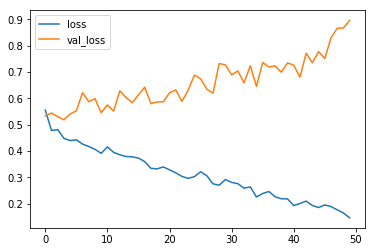

In [93]:
import random
random.seed(3)
for i in range(1):
    filepath = "/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_weights-hilbert-loop-model_"+str(i)+".hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
    csv_logger = CSVLogger('/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_log_'+str(i)+'.csv', append=True, separator=',')
    callbacks_list = [checkpoint,csv_logger, plot_losses]
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#   model.load_weights("../model_checkpoints/densenet-hilbert-split-unmatched-tr+val-normalized/weights-hilbert-loop-model_"+str(0)+".hdf5")
    model.fit(x_train,y_train,batch_size=64,epochs=50,validation_data = (x_val,y_val), callbacks=callbacks_list)

## Final Evaluation

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [24]:
model.load_weights("/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_weights-hilbert-loop-model_0.hdf5")
##model.evaluate(X_tt, lab_tt, batch_size=64)
y_test_prob = model.predict(x = x_val, batch_size=64)
y_classes = np.round(y_test_prob[:,1])
y_true = y_val[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob[:,1])))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.7734939759036145
Recall: 0.8514056224899599
Precision: 0.7881040892193308
F1 score: 0.8185328185328186
ROC: 0.8275753616877146
[[109  57]
 [ 37 212]]


In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [26]:
fpr, tpr, thresholds =roc_curve(y_true, y_test_prob[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.827575


In [27]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [28]:
cutoff_youdens_j(fpr, tpr, thresholds)

0.46605363

In [29]:
youdens = cutoff_youdens_j(fpr, tpr, thresholds)

In [30]:
y_test_prob = model.predict(x_test)
y_test_prob = y_test_prob[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = y_test[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.744578313253012
Recall: 0.8127490039840638
Precision: 0.7756653992395437
F1 score: 0.7937743190661478
ROC: 0.8302400155475659
[[105  59]
 [ 47 204]]


In [31]:
fpr, tpr, thresholds =roc_curve(y_true, y_test_prob)
roc_auc = auc(fpr, tpr)

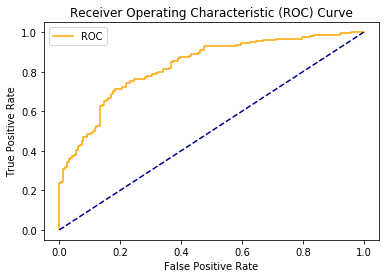

Area under the ROC curve : 0.830240


In [32]:
plot_roc_curve(fpr, tpr)
plt.show()
print("Area under the ROC curve : %f" % roc_auc)

In [33]:
prob = model.predict(x_test)
prob = pd.DataFrame(prob)
prob.to_csv('/home/safeicu/aditya/LSTM_FCN/probs/shock/shock-lfcn-mimic.csv', index=None)

### With age-gender

In [34]:
from sklearn.linear_model import Lasso

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
import pickle

In [37]:
import keras 

In [38]:
demo_train = np.array(demo_train)
demo_test = np.array(demo_test)
demo_val = np.array(demo_val)

In [39]:
model.load_weights("/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_weights-hilbert-loop-model_0.hdf5")

#Intermediate layer model
intermediate_layer_model = models.Model(inputs=model.input, outputs= model.layers[-2].output)

#Predictions from the intermediate layer model
X_tr_int = intermediate_layer_model.predict(x_train)
X_val_int = intermediate_layer_model.predict(x_val)
X_tt_int = intermediate_layer_model.predict(x_test)

#Concat intermediate activations and age_gender
X_tr_int = np.concatenate((X_tr_int, demo_train), axis = 1)
X_val_int = np.concatenate((X_val_int, demo_val), axis = 1)
X_tt_int = np.concatenate((X_tt_int, demo_test), axis = 1)

mean_calc1 = np.mean(X_tr_int, axis=0)
std_calc1 = np.std(X_tr_int, axis = 0, ddof = 1)

X_tr_int -= mean_calc1
X_tt_int -= mean_calc1
X_val_int -= mean_calc1
# Apply featurewise_std_normalization to test-data with statistics from train data
X_tr_int /= (std_calc1 + K.epsilon())
X_tt_int /= (std_calc1 + K.epsilon())
X_val_int /= (std_calc1 + K.epsilon())


#Fit LogReg
clf = LogisticRegression(penalty="l1", random_state=0)
clf.fit(X_tr_int, y_train[:,1])


#now you can save it to a file
with open('/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/mimic+age+gender+final.pkl', 'wb') as f:
    pickle.dump(clf, f)



#Get LogReg preds and calculate metrics
y_test_prob = clf.predict_proba(X_val_int)[:,1]
y_classes = clf.predict(X_val_int)
y_true = y_val[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.7686746987951807
Recall: 0.8353413654618473
Precision: 0.7908745247148289
F1 score: 0.8125
ROC: 0.8105675714907825
[[111  55]
 [ 41 208]]


In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [41]:
fpr, tpr, thresholds =roc_curve(y_true, y_test_prob)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.810568


In [42]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [43]:
cutoff_youdens_j(fpr, tpr, thresholds)

0.6065561500553938

In [44]:
youdens = cutoff_youdens_j(fpr, tpr, thresholds)

In [45]:
y_test_prob = clf.predict_proba(X_tt_int)[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = y_test[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.7180722891566265
Recall: 0.7051792828685259
Precision: 0.8045454545454546
F1 score: 0.7515923566878983
ROC: 0.8011855018948596
[[121  43]
 [ 74 177]]


In [47]:
prob = clf.predict_proba(X_tt_int)
prob = pd.DataFrame(prob)
prob.to_csv('/home/safeicu/aditya/LSTM_FCN/probs/shock/shock-lfcn-mimic-age-gender.csv', index=None)

_____
_____

# Safe icu results

In [118]:
x_train = pd.read_csv('/home/safeicu/aditya/safeicu_si/tr_test_safeicu_50_50/x_train_dias.csv')
x_test = pd.read_csv('/home/safeicu/aditya/safeicu_si/tr_test_safeicu_50_50/x_test_dias.csv')

y_train = pd.read_csv('/home/safeicu/aditya/safeicu_si/tr_test_safeicu_50_50/y_train.csv')
y_test = pd.read_csv('/home/safeicu/aditya/safeicu_si/tr_test_safeicu_50_50/y_test.csv')

print(x_train.shape)
print(y_test.shape)

(81, 1284)
(82, 4)


In [119]:
x_train = np.array(x_train.drop(['id', 'GENDER', 'age', 'label'], axis = 1))

x_test = np.array(x_test.drop(['id', 'GENDER', 'age', 'label'], axis = 1))

In [120]:
x_train_hr = x_train[:,0:256]
mean_hr_tr = np.mean(x_train_hr)
std_hr_tr = np.nanstd(x_train_hr)
x_train_hr = (x_train_hr - mean_hr_tr)/(std_hr_tr)
                                                        ##, ddof = 1) + K.epsilon())
print(x_train_hr.shape)

x_train_resp = x_train[:,256:512]
mean_resp_tr = np.mean(x_train_resp)
std_resp_tr = np.nanstd(x_train_resp)
x_train_resp = (x_train_resp - mean_resp_tr)/(std_resp_tr)
                                                              ##, ddof = 1) + K.epsilon())
print(x_train_resp.shape)

x_train_sp = x_train[:,512:768]
mean_sp_tr = np.mean(x_train_sp)
std_sp_tr = np.nanstd(x_train_sp)
x_train_sp = (x_train_sp - mean_sp_tr)/(std_sp_tr)
                                                        ##, ddof = 1) + K.epsilon())
print(x_train_sp.shape)

x_train_sys = x_train[:,768:1024]
mean_sys_tr = np.mean(x_train_sys)
std_sys_tr = np.nanstd(x_train_sys)
x_train_sys = (x_train_sys -mean_sys_tr)/ (std_sys_tr)
                                                            ##, ddof = 1) + K.epsilon())
print(x_train_sys.shape)

x_train_dias = x_train[:,1024:1280]
mean_dias_tr = np.mean(x_train_dias)
std_dias_tr = np.nanstd(x_train_dias)
x_train_dias = (x_train_dias - mean_dias_tr)/ (std_dias_tr)
                                                               ##, ddof = 1) + K.epsilon())
print(x_train_dias.shape)


######################### Test centering ##############
x_test_hr = x_test[:,0:256]
x_test_hr = (x_test_hr - mean_hr_tr )/ (std_hr_tr) 
                                                        #ddof = 1) + K.epsilon())

x_test_resp = x_test[:,256:512]
x_test_resp = (x_test_resp - mean_resp_tr)/ (std_resp_tr)
                                                             #ddof = 1) + K.epsilon())

x_test_sp = x_test[:,512:768]
x_test_sp = (x_test_sp - mean_sp_tr)/ (std_sp_tr) 
                                                       #ddof = 1) + K.epsilon())

x_test_sys = x_test[:,768:1024]
x_test_sys = (x_test_sys - mean_sys_tr)/ (std_sys_tr)

x_test_dias = x_test[:,1024:1280]
print(np.mean(x_test_dias))
x_test_dias = (x_test_dias - mean_dias_tr)/ (std_dias_tr)
print(x_test_dias.shape)


(81, 256)
(81, 256)
(81, 256)
(81, 256)
(81, 256)
57.25805520607302
(82, 256)


In [121]:
from numpy import zeros, newaxis
#x_train_hr = np.array(x_train_hr)

x_train_hr = x_train_hr[:, newaxis,:]
x_train_resp = x_train_resp[:, newaxis,:]
x_train_sp = x_train_sp[:,newaxis,:]
x_train_sys = x_train_sys[:,newaxis,:]
x_train_dias = x_train_dias[:,newaxis,:]

x_val_hr = x_val_hr[:,newaxis,:]
x_val_resp = x_val_resp[:,newaxis,:]
x_val_sp = x_val_sp[:,newaxis,:]
x_val_sys = x_val_sys[:, newaxis,:]
x_val_dias = x_val_dias[:,newaxis,:]

x_test_hr = x_test_hr[:,newaxis,:]
x_test_resp = x_test_resp[:, newaxis,:]
x_test_sp = x_test_sp[:,  newaxis,:]
x_test_sys = x_test_sys[:, newaxis,:]
x_test_dias = x_test_dias[:, newaxis,:]

In [122]:
x_val =  np.hstack((np.array(x_train_hr), np.array(x_train_resp), np.array(x_train_sp), np.array(x_train_sys), np.array(x_train_dias))) 
x_test =  np.hstack((np.array(x_test_hr), np.array(x_test_resp), np.array(x_test_sp), np.array(x_test_sys),np.array(x_test_dias))) 
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(81, 1280)
(81, 5, 256)
(82, 5, 256)


In [123]:
demo_train = y_train.loc[ : , ['1', '2']]
print(demo_train.shape)
demo_test = y_test.loc[ : , ['1', '2']]
print(demo_test.shape)

(81, 2)
(82, 2)


In [124]:
demo_train['2'] = demo_train['2'] / 12 
demo_test['2'] = demo_test['2'] / 12 

mean_calc1 = np.mean(demo_train['2'], axis=0)
std_calc1 = np.std(demo_train['2'], axis = 0, ddof = 1)



In [125]:
demo_train['2'] -= mean_calc1
demo_test['2'] -= mean_calc1
# Apply featurewise_std_normalization to test-data with statistics from train data
demo_train['2'] /= (std_calc1 + K.epsilon())
demo_test['2'] /= (std_calc1 + K.epsilon())

In [126]:
y_val  =np.array(y_train.iloc[:,3])
y_test  = np.array(y_test.iloc[:,3])

y_val = keras.utils.to_categorical(y_val, 2)
print(y_val.shape)




(81, 2)


In [127]:
print(y_val.shape)
y_test = keras.utils.to_categorical(y_test, 2)
print(y_test.shape)

(81, 2)
(82, 2)


___
___

# Evaluation

## Without age gender

In [128]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [129]:
model.load_weights("/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_weights-hilbert-loop-model_0.hdf5")
#     model.evaluate(X_tt, lab_tt, batch_size=64)
y_test_prob = model.predict(x = x_val, batch_size=1)
y_test_prob = y_test_prob[:,1]
y_classes = np.round(y_test_prob)
y_true = y_val[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5555555555555556
Recall: 0.6153846153846154
Precision: 0.38095238095238093
F1 score: 0.47058823529411764
ROC: 0.6118881118881119
[[29 26]
 [10 16]]


In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [131]:
fpr, tpr, thresholds =roc_curve(y_true, y_test_prob)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.611888


In [132]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [133]:
cutoff_youdens_j(fpr, tpr, thresholds)

0.77825916

In [134]:
youdens = cutoff_youdens_j(fpr, tpr, thresholds)

In [135]:
y_test_prob = model.predict(x_test)
y_test_prob = y_test_prob[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = y_test[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes))) 
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5975609756097561
Recall: 0.65
Precision: 0.3333333333333333
F1 score: 0.4406779661016949
ROC: 0.6629032258064516
[[36 26]
 [ 7 13]]


In [136]:
prob = model.predict(x_test)
prob = pd.DataFrame(prob)
prob.to_csv('/home/safeicu/aditya/LSTM_FCN/probs/shock/shock-lfcn-safeicu.csv', index=None)

In [137]:
print(tf.__version__)

1.13.1


### With age-gender

In [138]:
from sklearn.linear_model import Lasso

In [139]:
import pickle

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
model.load_weights("/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/64_batch_weights-hilbert-loop-model_0.hdf5")
#Intermediate layer model
intermediate_layer_model = models.Model(inputs=model.input, outputs= model.layers[-2].output)

#Predictions from the intermediate layer model
X_val_int = intermediate_layer_model.predict(x_val)
X_tt_int = intermediate_layer_model.predict(x_test)

#Concat intermediate activations and age_gender
demo_train = np.array(demo_train)
demo_test = np.array(demo_test)

X_val_int = np.concatenate((X_val_int, demo_train), axis = 1)
X_tt_int = np.concatenate((X_tt_int, demo_test), axis = 1)

mean_calc1 = np.mean(X_val_int, axis=0)
std_calc1 = np.std(X_val_int, axis = 0, ddof = 1)


X_tt_int -= mean_calc1
X_val_int -= mean_calc1
# Apply featurewise_std_normalization to test-data with statistics from train data

X_tt_int /= (std_calc1 + K.epsilon())
X_val_int /= (std_calc1 + K.epsilon())



with open('/home/safeicu/aditya/LSTM_FCN/model_checkpoints/shock/mimic-normalized-age90-256/mimic+age+gender+final.pkl', 'rb') as f:
    clf = pickle.load(f)
#Fit LogReg

#now you can save it to a file



#Get LogReg preds and calculate metrics
y_test_prob = clf.predict_proba(X_val_int)[:,1]
y_classes = clf.predict(X_val_int)
y_true = y_val[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.6172839506172839
Recall: 0.6153846153846154
Precision: 0.43243243243243246
F1 score: 0.5079365079365079
ROC: 0.5965034965034965
[[34 21]
 [10 16]]


In [142]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

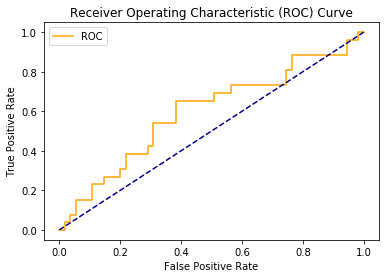

Area under the ROC curve : 0.596503


In [143]:
fpr, tpr, thresholds = roc_curve(y_true, y_test_prob)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
plt.show()
print("Area under the ROC curve : %f" % roc_auc)

In [146]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [147]:
cutoff_youdens_j(fpr, tpr, thresholds)

0.4547559055234338

In [148]:
youdens = cutoff_youdens_j(fpr, tpr, thresholds)

In [150]:
y_test_prob = clf.predict_proba(X_tt_int)[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = y_test[:,1]
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5365853658536586
Recall: 0.8
Precision: 0.32
F1 score: 0.45714285714285713
ROC: 0.6919354838709677
[[28 34]
 [ 4 16]]


In [153]:
prob = clf.predict_proba(X_tt_int)
prob = pd.DataFrame(prob)
prob.to_csv('/home/safeicu/aditya/LSTM_FCN/probs/shock/shock-lfcn-safeicu-age-gender.csv', index=None)

## Safeicu evaluation 

In [99]:
model.load_weights("../model_checkpoints/densenet-hilbert-split-mimic-normalized/weights-hilbert-loop-model_"+str(0)+".hdf5")

#Intermediate layer model
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer("avg_pool").output)

#Predictions from the intermediate layer model
X_val_int = intermediate_layer_model.predict(X_val)
X_tt_int = intermediate_layer_model.predict(X_tt)

#Concat intermediate activations and age_gender
X_val_int = np.hstack([X_val_int, age_gender_val, nlts_val, val_lstm])
X_tt_int = np.hstack([X_tt_int, age_gender_tt, nlts_test, test_lstm])

# #Fit LogReg
# clf = LogisticRegression(penalty="l1", random_state=0)
# clf.fit(X_tr_int, lab_tr)


with open('../model_checkpoints/mimic+hilbert+age+gender+nlts+lstm.pkl', 'rb') as f:
    clf = pickle.load(f)


In [94]:
y_test_prob = clf.predict_proba(X_val_int)[:,1]
y_classes = clf.predict(X_val_int)
y_true = lab_val
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5342465753424658
Recall: 0.0
Precision: 0.0
F1 score: 0.0
ROC: 0.3431372549019608
[[39  0]
 [34  0]]


In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [95]:
fpr, tpr, thresholds =roc_curve(y_true, y_test_prob)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.343137


In [70]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [71]:
cutoff_youdens_j(fpr, tpr, thresholds)

1.0

In [72]:
youdens = cutoff_youdens_j(fpr, tpr, thresholds)

### Without Age gender

In [76]:
y_test_prob = model.predict(X_val)
y_classes = (y_test_prob>youdens)*1
y_true = lab_val
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5428571428571428
Recall: 0.4883720930232558
Precision: 0.6774193548387096
F1 score: 0.5675675675675677
ROC: 0.5189491817398795
[[34 20]
 [44 42]]


____
____

## If Age gender

In [157]:
y_test_prob = clf.predict_proba(X_val_int)[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = lab_val
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.7083333333333334
Recall: 0.9318181818181818
Precision: 0.6949152542372882
F1 score: 0.796116504854369
ROC: 0.6477272727272727
[[10 18]
 [ 3 41]]


In [74]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true, y_test_prob)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.21


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

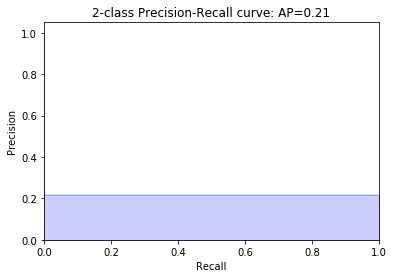

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
from inspect import signature

precision, recall, _ = precision_recall_curve(y_true, y_test_prob)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

### Without age gender

In [77]:
#Without Age gender
#Age gender below
y_test_prob = model.predict(X_tt)
y_classes = (y_test_prob>youdens)*1
y_true = lab_tt
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.5460992907801419
Recall: 0.52
Precision: 0.7647058823529411
F1 score: 0.6190476190476191
ROC: 0.5695121951219513
[[25 16]
 [48 52]]


____
____

In [73]:
y_test_prob = clf.predict_proba(X_tt_int)[:,1]
y_classes = (y_test_prob>youdens)*1
y_true = lab_tt
print("Accuracy: " + str(accuracy_score(y_true, y_classes)))
print("Recall: " + str(recall_score(y_true, y_classes)))
print("Precision: " + str(precision_score(y_true, y_classes)))
print("F1 score: " + str(f1_score(y_true, y_classes)))
print("ROC: " + str(roc_auc_score(y_true, y_test_prob)))
print(confusion_matrix(y_true, y_classes))

Accuracy: 0.2907801418439716
Recall: 0.0
Precision: 0.0
F1 score: 0.0
ROC: 0.4657317073170732
[[ 41   0]
 [100   0]]


/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
pd.DataFrame(y_test_prob).to_csv("./probs/hilbert-safeicu-pretr-new.csv", index=False)

In [56]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true, y_test_prob)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

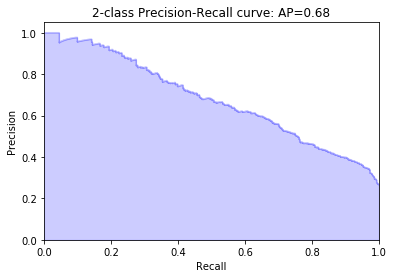

In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
from inspect import signature

precision, recall, _ = precision_recall_curve(y_true, y_test_prob)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))